<a href="https://colab.research.google.com/github/KieuSonTung/Machine_Learning/blob/main/3.%20LinearRegressions/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from google.colab import drive
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
df1 = pd.read_csv(url)

In [ ]:
df1.head(5)

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


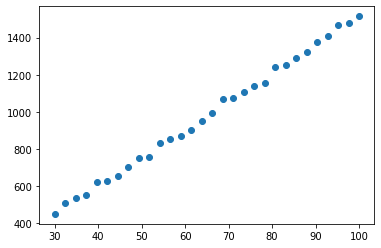

In [ ]:
X, Y = df1['Diện tích'], df1['Giá']
plt.scatter(X, Y)

In [ ]:
# add x0 into X dataset
x0 = pd.Series(np.ones(len(X)), name='x0')
X = pd.concat([x0, X], axis=1)
X.rename(columns={'Diện tích': 'x1'}, inplace=True)

In [ ]:
def cal_w(X, Y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), Y)
    return w

In [ ]:
w1 = cal_w(X, Y)
Y_test = np.dot(X, w1)
Y_test

array([ 449.26845534,  485.98498632,  522.70151729,  559.41804826,
        596.13457923,  632.85111021,  669.56764118,  706.28417215,
        742.99918201,  779.71571299,  816.43224396,  853.14877493,
        889.8653059 ,  926.58183687,  963.29836785, 1000.01489882,
       1036.73142979, 1073.44796076, 1110.16449174, 1146.88102271,
       1183.59755368, 1220.31408465, 1257.02909452, 1293.74562549,
       1330.46215646, 1367.17868743, 1403.89521841, 1440.61174938,
       1477.32828035, 1514.04481132])

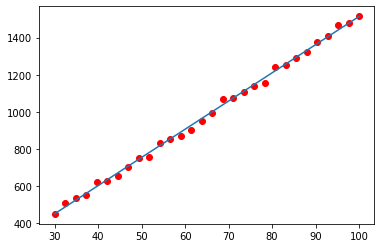

In [ ]:
plt.plot(X.x1, Y_test)
plt.scatter(X.x1, Y, color='red')
plt.show()

In [ ]:
x_pred = {'x0' : [1, 1, 1], 'x1' : [50, 100, 150]}
X_pred = pd.DataFrame(data=x_pred)
Y_pred = np.dot(X_pred, w1)
Y_pred

array([ 753.49027134, 1514.04481132, 2274.59935131])

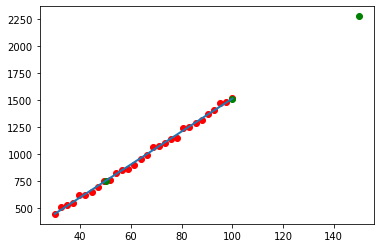

In [ ]:
plt.plot(X.x1, Y_test, linewidth=2)
plt.scatter(X.x1, Y, color='red')
plt.scatter(X_pred.x1, Y_pred, color='green')
plt.show()

In [ ]:
housing_df.head(5)

In [ ]:
X = housing_df.drop(columns='MEDV')
Y = housing_df['MEDV']

In [ ]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

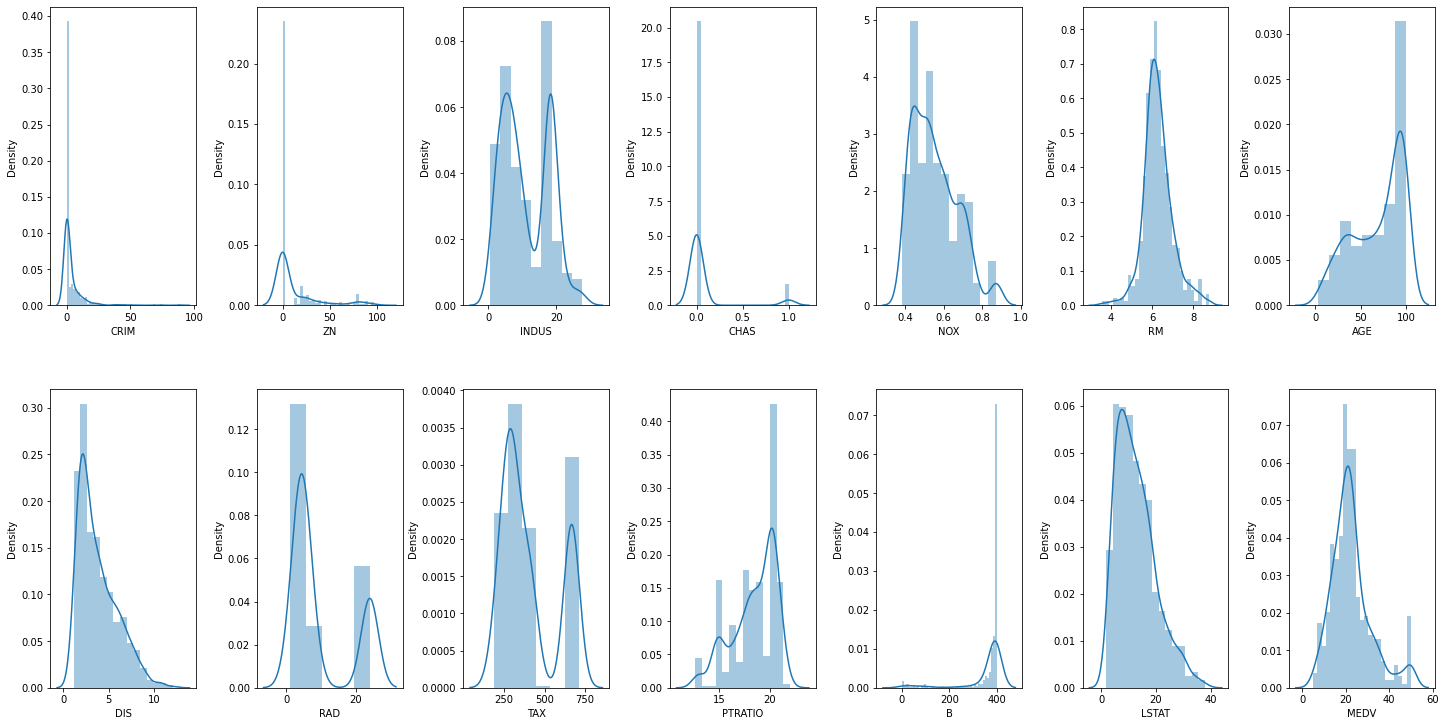

In [ ]:
# distribution plot of each feature
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

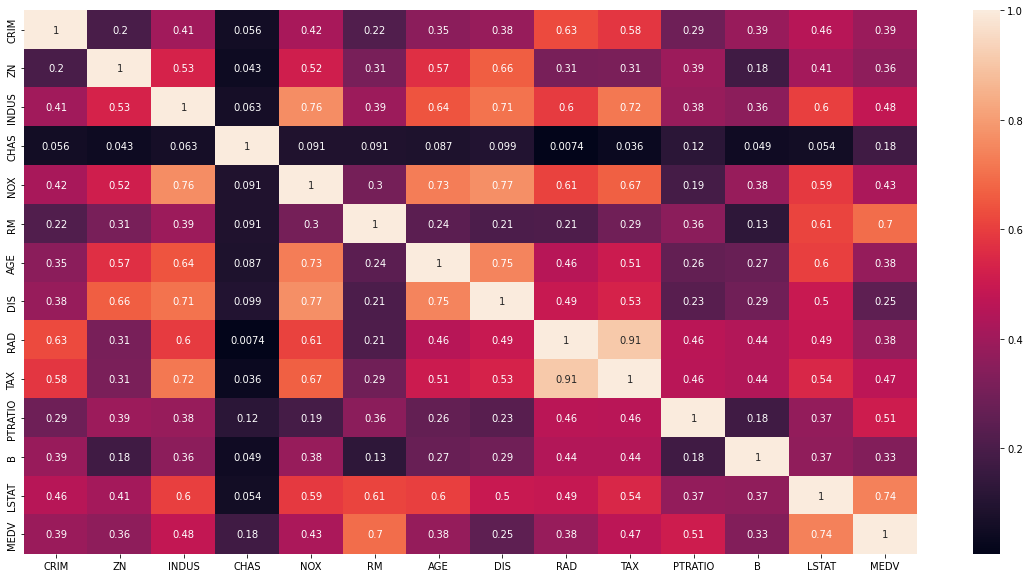

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(housing_df.corr().abs(),  annot=True)

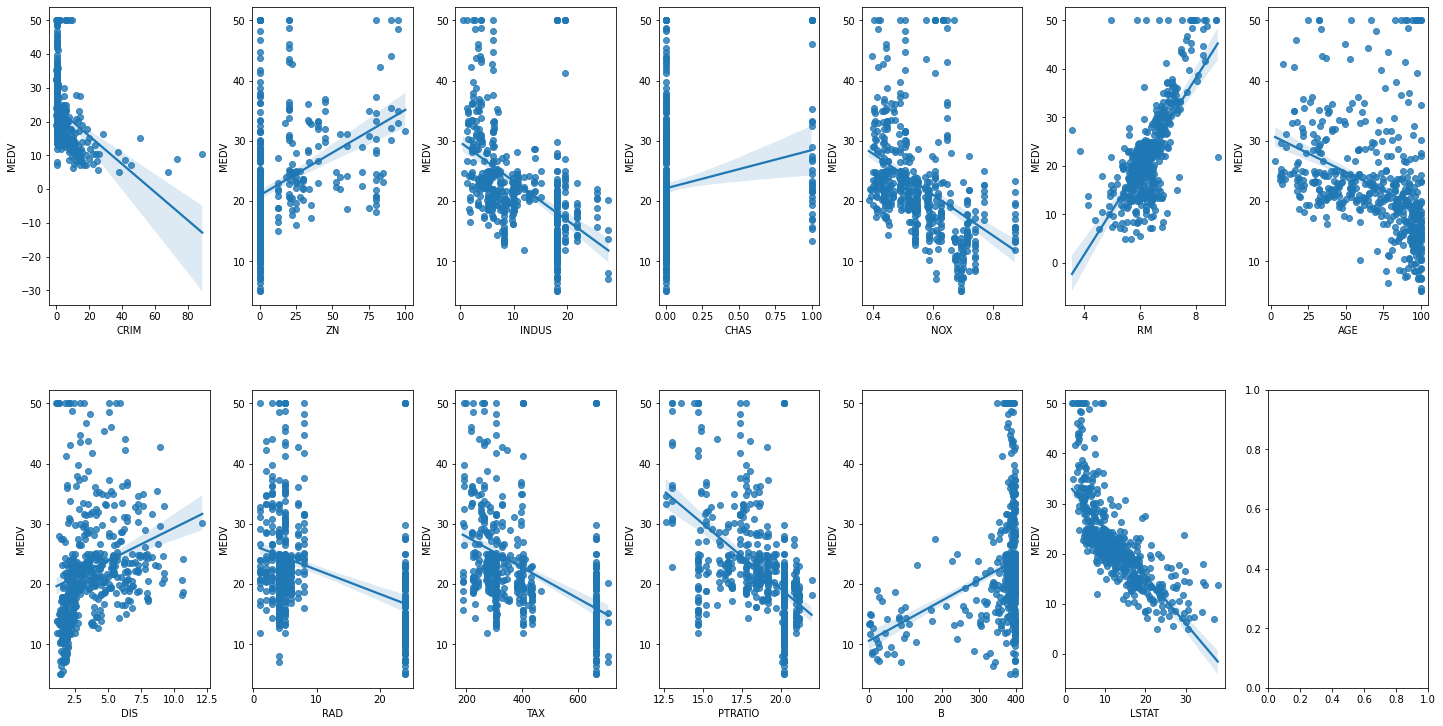

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in X.items():
    sns.regplot(y=Y, x=X[k], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
data = [X.INDUS, X.NOX, X.RM, X.AGE, X.DIS, X.PTRATIO, X.LSTAT]
headers = ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']
X_new = pd.concat(data, axis=1, keys=headers)
X_new.head()

,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT
0,2.31,0.538,6.575,65.2,4.0900,15.3,4.98
1,7.07,0.469,6.421,78.9,4.9671,17.8,9.14
2,7.07,0.469,7.185,61.1,4.9671,17.8,4.03
3,2.18,0.458,6.998,45.8,6.0622,18.7,2.94
4,2.18,0.458,7.147,54.2,6.0622,18.7,5.33


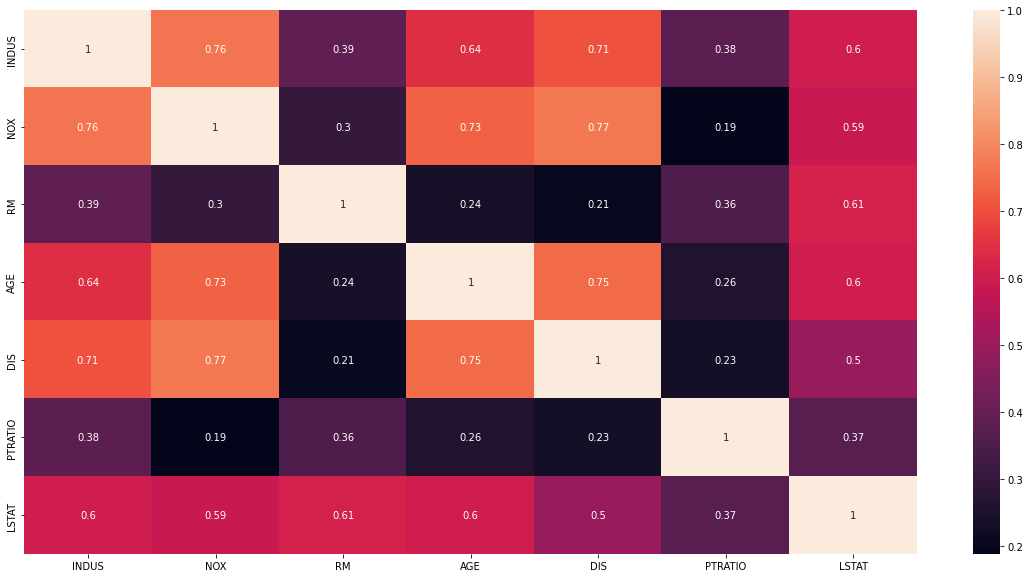

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_new.corr().abs(),  annot=True)

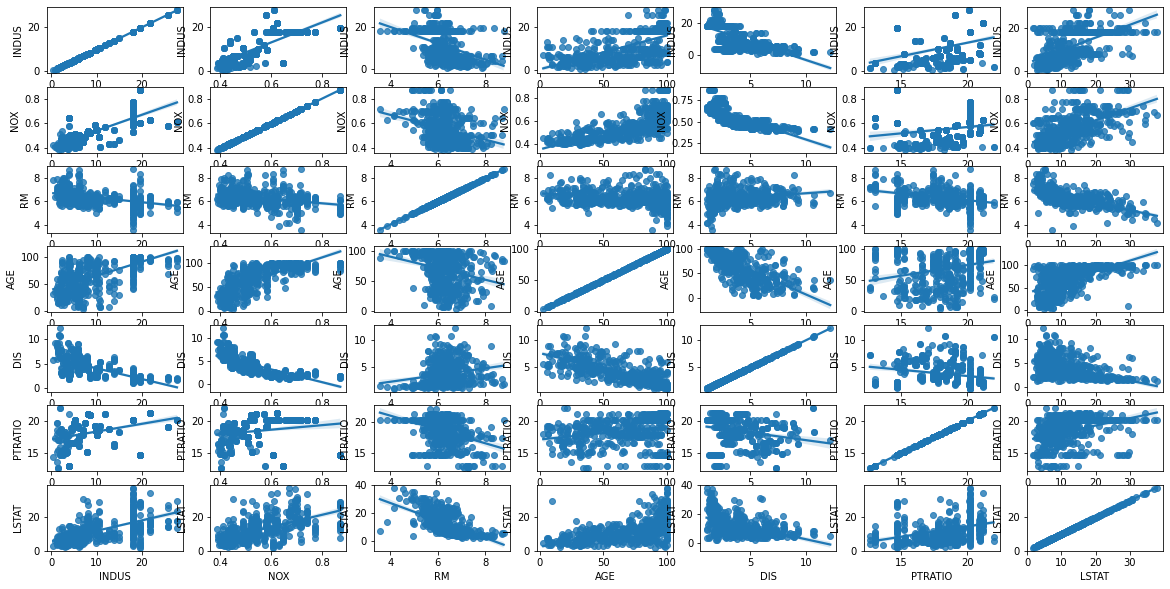

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=7, figsize=(20, 10))
index = 0
axs = axs.flatten()
for a, b in X_new.items():
    for k, v in X_new.items():
        sns.regplot(y=X_new[a], x=X_new[k], ax=axs[index])
        index += 1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

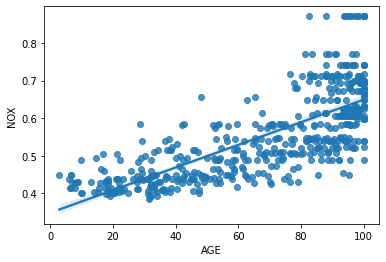

In [ ]:
sns.regplot(y=X_new['NOX'], x=X_new['AGE'])

In [ ]:
'''From the 2nd heatmap, we can see that NOX & DIS, DIS & AGE, NOX & AGE are 
highly correlated and DIS is the least correlated to MEDV => let's try removing
DIS'''
X_new = X_new.drop(columns='DIS')
X_new = pd.concat([pd.Series(np.ones(len(X_new))), X_new], axis=1)

In [ ]:
W = cal_w(X_new, Y)
Y_pred = np.dot(X_new, W)
Y_pred[:5]


array([31.15181539, 26.76749186, 32.5509058 , 30.85389736, 30.35491007])

In [ ]:
Y_mean = Y.mean()
Y_mean

22.532806324110698

In [ ]:
R_squared = np.sum((Y_pred - Y_mean)**2) / np.sum((Y - Y_mean)**2)
R_squared

0.6839298431281358